In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [208]:
# Problem statement:
# to predict the sales of an outlet. (Item_Outlet_Sales)

In [209]:
data=pd.read_csv('bigmartsales.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [210]:
data.shape

(8523, 13)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [212]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [213]:
#1. Outlet_establishment year can be considered as categorical
#2. Profit has a low STD
#3. Null values are present in Item_weight

In [214]:
data.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,2793,2793,5577


In [215]:
#1. Item_Identifier has lot of unique values


In [216]:
# Missing values

(data.isnull().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

In [217]:
#treat the missing values

data['Item_Weight'].skew()

-0.35221469353797713

<Axes: xlabel='Item_Weight', ylabel='Density'>

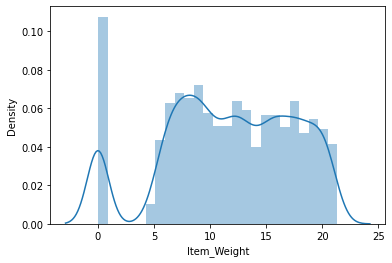

In [218]:
sns.distplot(data['Item_Weight'])

In [219]:
# -.5 to +.5 tolerable

<Axes: ylabel='Density'>

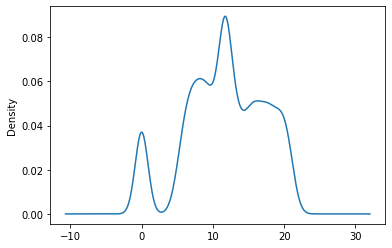

In [220]:
data['Item_Weight'].fillna(data['Item_Weight'].mean()).plot(kind='kde')

In [221]:
data['Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].transform('mean')
data['Item_Weight'].isnull().sum()

2

In [222]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [223]:
data.Item_Weight.isnull().sum()

0

<Axes: ylabel='Density'>

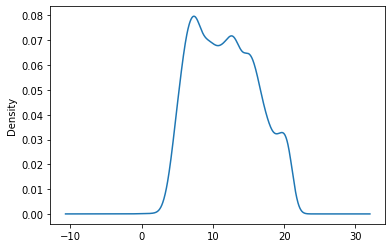

In [224]:
data['Item_Weight'].plot(kind='kde')

In [225]:
data['Outlet_Size'].value_counts(normalize=True)

Outlet_Size
Medium    0.456895
Small     0.390643
High      0.152462
Name: proportion, dtype: float64

In [226]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0]).value_counts(normalize=True).isnull().sum()

0

In [227]:
data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [228]:
ind1=data[data['Outlet_Size'].isnull()].index

In [229]:
#<=2100----- Small
#>2100 and <2400 ----- Medium
#>2400----- High

In [230]:
for i in ind1:
    if(data.loc[i,'Item_Outlet_Sales']<=2100):
        data.loc[i,'Outlet_Size']='Small'
    elif(data.loc[i,'Item_Outlet_Sales']>2100) & (data.loc[i,'Item_Outlet_Sales']<2400):
        data.loc[i,'Outlet_Size']='Medium'
    else:
        data.loc[i,'Outlet_Size']='High'
        

In [231]:
data['Outlet_Size'].isnull().sum()

0

In [232]:
data['Outlet_Size'].value_counts(normalize=True)

Outlet_Size
Small     0.463100
Medium    0.341898
High      0.195002
Name: proportion, dtype: float64

In [233]:
data['Outlet_Location_Type'].value_counts(normalize=True)

Outlet_Location_Type
Tier 2    0.431485
Tier1     0.368917
Tier 3    0.143983
?         0.018539
  --      0.016839
  -       0.010351
na        0.007415
NAN       0.002472
Name: proportion, dtype: float64

In [234]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].replace({'?':np.NaN,'  --':np.NaN,'  -':np.NaN,'na':np.NaN,'NAN':np.NaN})

In [235]:
data['Outlet_Location_Type'].fillna(data['Outlet_Location_Type'].mode()[0],inplace=True)

In [236]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

In [237]:

# data type casting  
data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].astype(object)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), object(8)
memory usage: 865.7+ KB

In [239]:
#EDA

In [240]:
num=data.select_dtypes(include=np.number)
cat=data.select_dtypes(include=object)

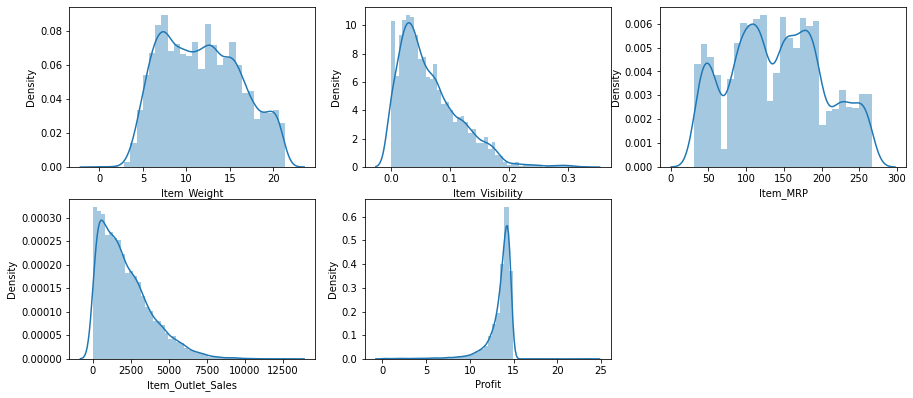

In [241]:
# Univariate
plt.figure(figsize=[15,10])
i=1
for col in num:
    ax=plt.subplot(3,3,i)
    sns.distplot(num[col])
    i=i+1

In [242]:
num.skew()

Item_Weight          0.228038
Item_Visibility      1.167091
Item_MRP             0.127390
Item_Outlet_Sales    1.177531
Profit              -3.379808
dtype: float64

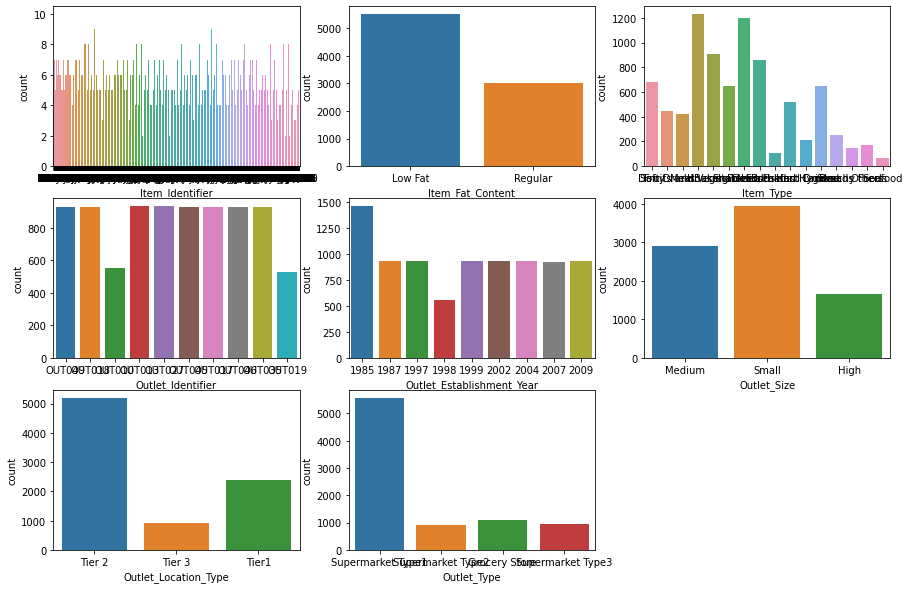

In [243]:
#categorical

plt.figure(figsize=[15,10])
i=1
for col in cat:
    ax=plt.subplot(3,3,i)
    sns.countplot(x=cat[col])
    i=i+1

In [244]:
#we can drop item_identifier
# value_counts and unique functions also can be used

<Axes: >

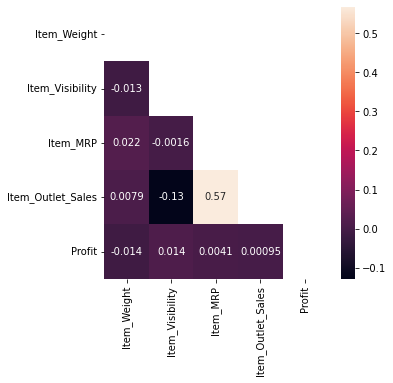

In [245]:
# Bivariate (num-num)
plt.figure(figsize=[5,5])
mask=np.triu(np.ones_like(num.corr()))
sns.heatmap(num.corr(),annot=True,mask=mask)

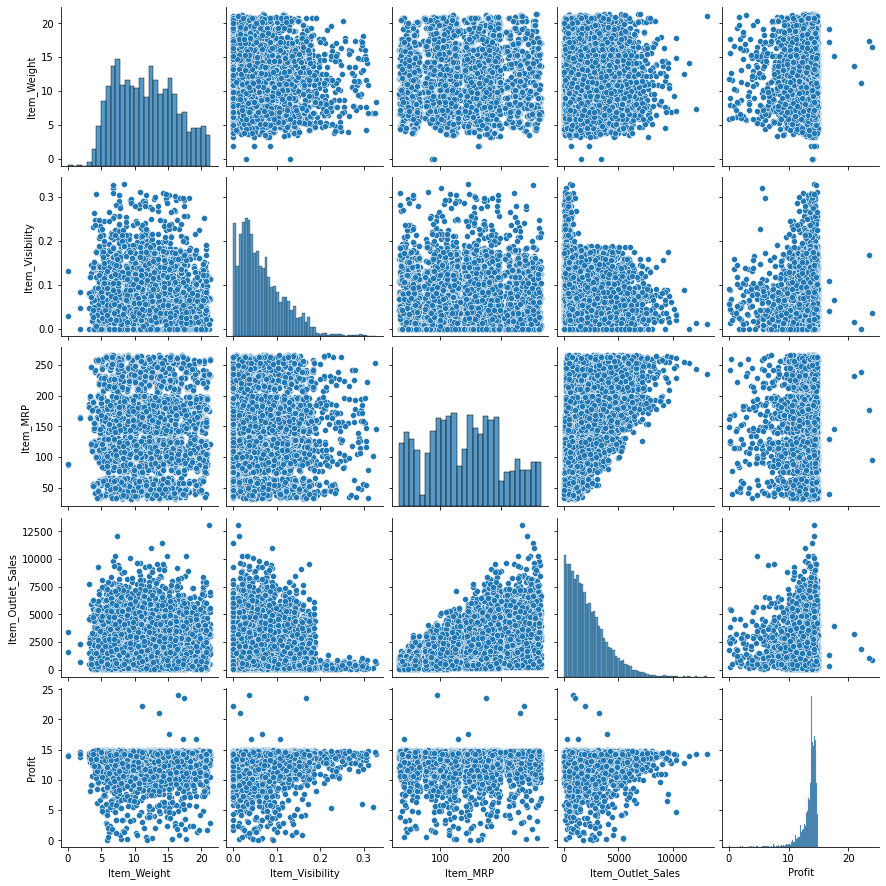

In [246]:
sns.pairplot(num)

In [247]:
# independent attributes should be less correlated
#correlation between independent attributes and target should be high
# Item_Mrp is highly correlated with target

In [248]:
#cat - target relationship

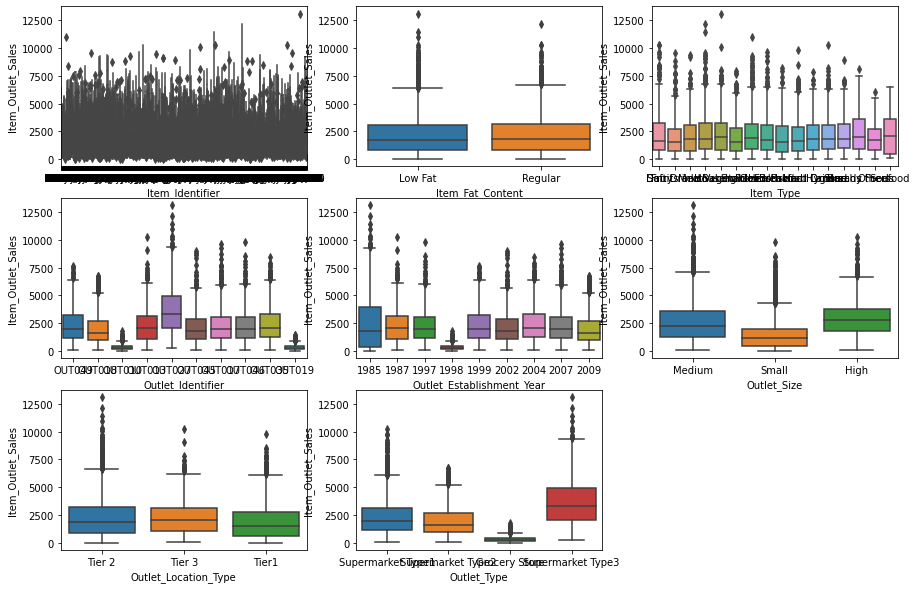

In [249]:
plt.figure(figsize=[15,10])
i=1
for col in cat:
    ax=plt.subplot(3,3,i)
    sns.boxplot(x=cat[col],y=data.Item_Outlet_Sales)
    i=i+1

In [250]:
data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [251]:
#cat-cat

tab= pd.crosstab(cat['Outlet_Type'],cat['Outlet_Size'])

In [252]:
tab

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,1083
Supermarket Type1,1662,1051,2864
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


<Axes: xlabel='Outlet_Type'>

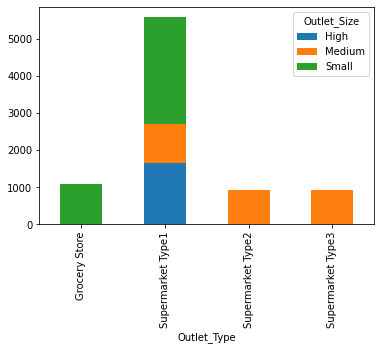

In [253]:
tab.plot(kind='bar',stacked=True)

In [254]:
# drop item_identifier

cat1=cat.drop('Item_Identifier', axis=1)

In [255]:
cat1

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 2,Supermarket Type1
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 2,Supermarket Type2
2,Low Fat,Meat,OUT049,1999,Medium,Tier 2,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,1998,Small,Tier 2,Grocery Store
4,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,1987,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,2002,Small,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,2004,Small,Tier1,Supermarket Type1
8521,Regular,Snack Foods,OUT018,2009,Medium,Tier 2,Supermarket Type2


In [256]:
num['Age_outlet']=2023-cat['Outlet_Establishment_Year']
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Age_outlet
0,9.300000,0.016047,249.8,3735.1380,11.5,24
1,5.920000,0.019278,48.3,443.4228,14.3,14
2,14.583333,0.016760,141.6,2097.2700,14.5,24
3,19.200000,0.000000,182.1,732.3800,13.6,25
4,8.930000,0.000000,53.9,994.7052,14.1,36


In [257]:
cat1.drop('Outlet_Establishment_Year',inplace=True,axis=1)

In [258]:
cat1.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Small,Tier 2,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [259]:
#categorical Encoding
cat1.columns


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [260]:
cat1.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [261]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
#import category_encoders as ce

In [262]:
#!pip install category_encoders 

In [264]:
cat1=pd.get_dummies(cat1,columns=['Item_Fat_Content','Outlet_Type'],drop_first=True,dtype=int)
cat1.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,Dairy,OUT049,Medium,Tier 2,0,1,0,0
1,Soft Drinks,OUT018,Medium,Tier 2,1,0,1,0
2,Meat,OUT049,Medium,Tier 2,0,1,0,0
3,Fruits and Vegetables,OUT010,Small,Tier 2,1,0,0,0
4,Household,OUT013,High,Tier 3,0,1,0,0


In [ ]:
cat1.columns

In [265]:
oh=OneHotEncoder()
loc_type=pd.DataFrame(oh.fit_transform(cat1[['Outlet_Location_Type']]).toarray(),columns=['tier1','tier2','tier3'])
cat1=pd.concat([cat1,loc_type],axis=1)

cat1.drop('Outlet_Location_Type',axis=1, inplace=True)

In [266]:
cat1.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,tier1,tier2,tier3
0,Dairy,OUT049,Medium,0,1,0,0,1.0,0.0,0.0
1,Soft Drinks,OUT018,Medium,1,0,1,0,1.0,0.0,0.0
2,Meat,OUT049,Medium,0,1,0,0,1.0,0.0,0.0
3,Fruits and Vegetables,OUT010,Small,1,0,0,0,1.0,0.0,0.0
4,Household,OUT013,High,0,1,0,0,0.0,1.0,0.0


In [267]:
# Ordinal encoding

oe=OrdinalEncoder(categories=[['Small','Medium','High']])
cat1['Outlet_Size']=oe.fit_transform(cat1['Outlet_Size'].values.reshape(-1,1))
cat1.head()


,Item_Type,Outlet_Identifier,Outlet_Size,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,tier1,tier2,tier3
0,Dairy,OUT049,1.0,0,1,0,0,1.0,0.0,0.0
1,Soft Drinks,OUT018,1.0,1,0,1,0,1.0,0.0,0.0
2,Meat,OUT049,1.0,0,1,0,0,1.0,0.0,0.0
3,Fruits and Vegetables,OUT010,0.0,1,0,0,0,1.0,0.0,0.0
4,Household,OUT013,2.0,0,1,0,0,0.0,1.0,0.0


In [268]:
#target encoding

In [269]:
tab=data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
tab

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [270]:
cat1['Outlet_Identifier']=cat1['Outlet_Identifier'].map(tab)
cat1.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,tier1,tier2,tier3
0,Dairy,2348.354635,1.0,0,1,0,0,1.0,0.0,0.0
1,Soft Drinks,1995.498739,1.0,1,0,1,0,1.0,0.0,0.0
2,Meat,2348.354635,1.0,0,1,0,0,1.0,0.0,0.0
3,Fruits and Vegetables,339.351662,0.0,1,0,0,0,1.0,0.0,0.0
4,Household,2298.995256,2.0,0,1,0,0,0.0,1.0,0.0


In [274]:
# target encoding using category encoders Library
import category_encoders as ce

target=ce.TargetEncoder()
cat1['target_enc2']=target.fit_transform(cat1['Item_Type'], data['Item_Outlet_Sales'])
cat1['target_enc2']

0       2232.542597
1       2006.511735
2       2158.977911
3       2289.009592
4       2258.784300
           ...     
8518    2277.321739
8519    1952.971207
8520    2010.000265
8521    2277.321739
8522    2006.511735
Name: target_enc2, Length: 8523, dtype: float64

In [276]:
cat1.drop('Item_Type',axis=1,inplace=True)

In [277]:
cat1.head()

,Outlet_Identifier,Outlet_Size,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,tier1,tier2,tier3,target_enc2
0,2348.354635,1.0,0,1,0,0,1.0,0.0,0.0,2232.542597
1,1995.498739,1.0,1,0,1,0,1.0,0.0,0.0,2006.511735
2,2348.354635,1.0,0,1,0,0,1.0,0.0,0.0,2158.977911
3,339.351662,0.0,1,0,0,0,1.0,0.0,0.0,2289.009592
4,2298.995256,2.0,0,1,0,0,0.0,1.0,0.0,2258.784300


In [ ]:
# Outlier analysis for numerical variables

# Detect Outliers using IQR, Zscore, plots and .skew() function
# Outlier Treatment :
   # 1. Dropping the outliers
   # 2. Capping the outliers to a specific values (Winsorization)
   # 3. Transformation functions

In [279]:
num.skew()

Item_Weight          0.228038
Item_Visibility      1.167091
Item_MRP              0.12739
Item_Outlet_Sales    1.177531
Profit              -3.379808
Age_outlet           0.396641
dtype: object

In [ ]:
# positive skewed: Item visibility, Item Outlet sales(target)
# Negative skewed: Profit

In [ ]:
# Item visibility (dropping)

In [ ]:
# profit (capping)

In [ ]:
#Scaling numerical columns Using minmax scaler or Standard scaler (not mandatory everytime)



In [ ]:
#Train test split